<a href="https://colab.research.google.com/github/AlfredXNet/Stroke-Prediction-App/blob/main/notebooks/stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install and import libraries**




In [1]:
# Install the requisite libraries
!pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
# Importing the requisite libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# **Load and explore the dataset**

In [3]:
# Loading the dataset
url = "https://raw.githubusercontent.com/AlfredXNet/Stroke-Prediction-App/main/data/stroke-data.csv"
Stroke_prediction = pd.read_csv(url)



In [4]:
# Displaying the first few records
Stroke_prediction.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [5]:
# Displaying the concise summary of the dataframe
Stroke_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# **Continue from here!**

#  Handle missing **values**

In [ ]:
# Filling missing values in 'bmi' column with 'unknown' value
Stroke_prediction['Symptoms'] = Stroke_prediction['Symptoms'].fillna('Unknown')

# **Visualize data**

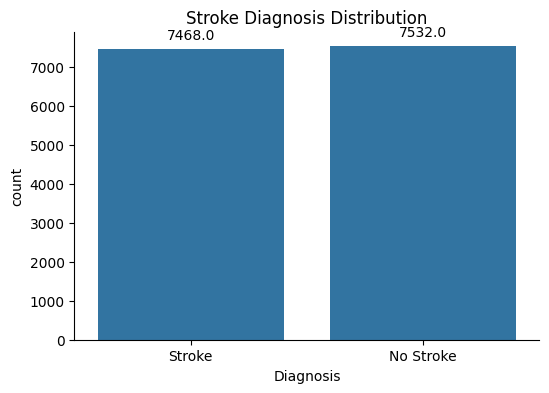

In [ ]:
# Distribution of Target Variable (Column: Diagnosis)
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Diagnosis', data=Stroke_prediction)
plt.title('Stroke Diagnosis Distribution')

# Remove top and right spines to prevent overlap
sns.despine(top=True, right=True)

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5),  # vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

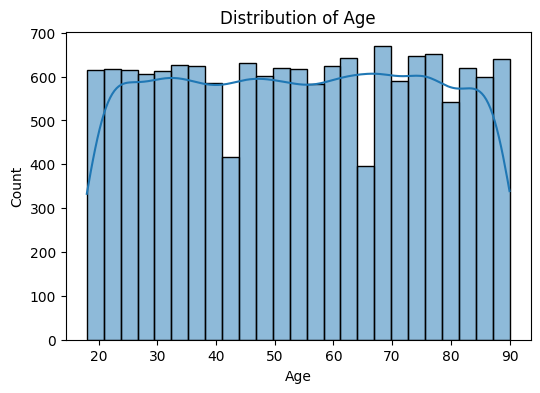

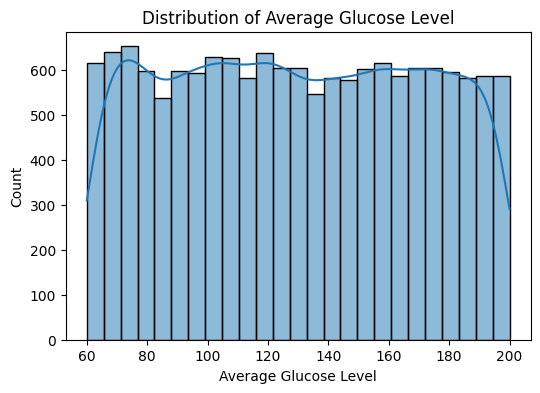

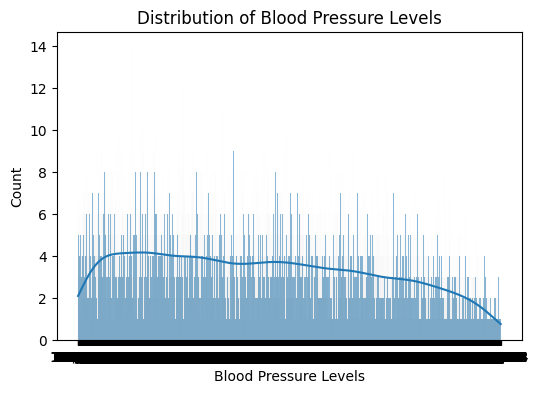

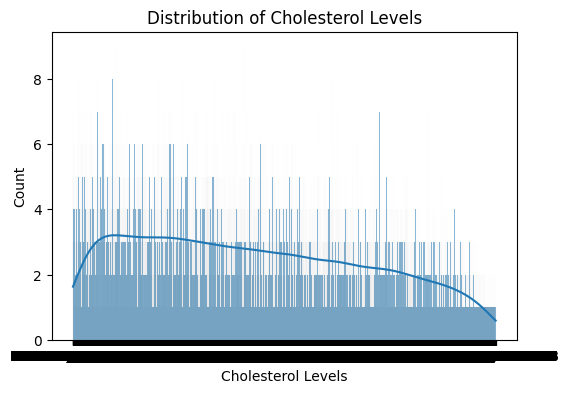

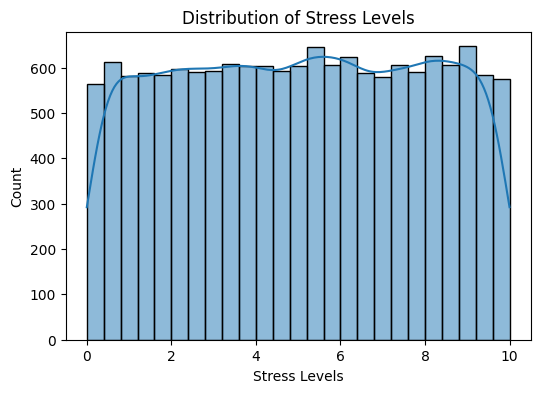

In [ ]:
# Numeric Features (Age, Average Glucose Level, Blood Pressure Levels, Cholesterol Levels, Stress Levels)
numeric_cols = ['Age', 'Average Glucose Level', 'Blood Pressure Levels', 'Cholesterol Levels', 'Stress Levels']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(Stroke_prediction[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


# **Exploring and visualizing numeric features** **🧠📊**

In [ ]:
# Identify numeric columns
Stroke_prediction.select_dtypes(include=['int64', 'float64']).columns

Index(['Patient ID', 'Age', 'Hypertension', 'Heart Disease',
       'Average Glucose Level', 'Body Mass Index (BMI)', 'Stroke History',
       'Stress Levels'],
      dtype='object')

In [ ]:
# Check basic statistics
Stroke_prediction.describe()


,Patient ID,Age,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Stroke History,Stress Levels
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,49715.802867,54.035667,0.249000,0.502933,129.445209,27.474302,0.500267,5.022694
std,29000.656642,21.063111,0.432448,0.500008,40.487792,7.230201,0.500017,2.873223
min,1.000000,18.000000,0.000000,0.000000,60.000000,15.010000,0.000000,0.000000
25%,24562.000000,36.000000,0.000000,0.000000,94.517500,21.160000,0.000000,2.540000
50%,49448.000000,54.000000,0.000000,1.000000,128.900000,27.420000,1.000000,5.050000
75%,75112.000000,72.000000,0.000000,1.000000,164.592500,33.720000,1.000000,7.520000
max,99975.000000,90.000000,1.000000,1.000000,200.000000,40.000000,1.000000,10.000000


## **Relationship Analysis — where we explore how different features relate to the target variable (Diagnosis)**

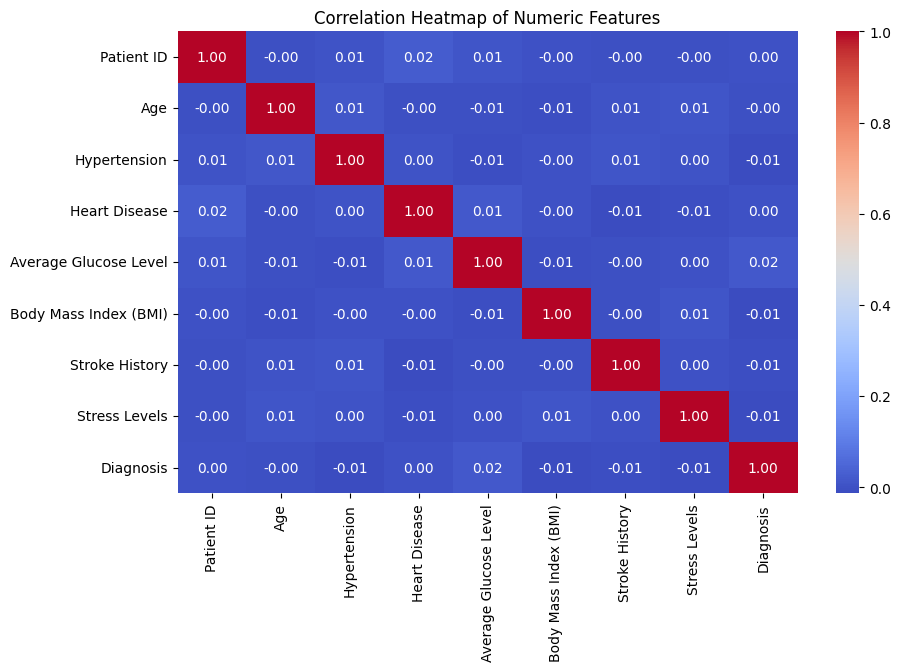

In [ ]:
# Correlation heatmap (for numeric features)

# Encode Diagnosis first
Stroke_prediction['Diagnosis'] = Stroke_prediction['Diagnosis'].map({'Stroke': 1, 'No Stroke': 0})

# Select only numeric columns
numeric_df = Stroke_prediction.select_dtypes(include=['int64', 'float64'])

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# **Data Preprocessing**

In [ ]:
# Display basic info
print("Dataset shape:", Stroke_prediction.shape)
print("\nMissing values:\n", Stroke_prediction.isnull().sum())
print("\nData types:\n", Stroke_prediction.dtypes)

Dataset shape: (15000, 22)

Missing values:
 Patient ID                  0
Patient Name                0
Age                         0
Gender                      0
Hypertension                0
Heart Disease               0
Marital Status              0
Work Type                   0
Residence Type              0
Average Glucose Level       0
Body Mass Index (BMI)       0
Smoking Status              0
Alcohol Intake              0
Physical Activity           0
Stroke History              0
Family History of Stroke    0
Dietary Habits              0
Stress Levels               0
Blood Pressure Levels       0
Cholesterol Levels          0
Symptoms                    0
Diagnosis                   0
dtype: int64

Data types:
 Patient ID                    int64
Patient Name                 object
Age                           int64
Gender                       object
Hypertension                  int64
Heart Disease                 int64
Marital Status               object
Work Type       

In [ ]:
# encode categorical columns and drop unneeded ones

# Drop non-informative columns
Stroke_prediction = Stroke_prediction.drop(['Patient ID', 'Patient Name'], axis=1)

# Convert categorical columns using one-hot encoding
categorical_cols = ['Gender', 'Marital Status', 'Work Type', 'Residence Type',
                    'Smoking Status', 'Alcohol Intake', 'Physical Activity',
                    'Family History of Stroke', 'Dietary Habits',
                    'Blood Pressure Levels', 'Cholesterol Levels', 'Symptoms']

Stroke_prediction_encoded = pd.get_dummies(Stroke_prediction, columns=categorical_cols, drop_first=True)

print("Shape after encoding:", Stroke_prediction_encoded.shape)
Stroke_prediction_encoded.head()


Shape after encoding: (15000, 16223)


,Age,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Stroke History,Stress Levels,Diagnosis,Gender_Male,Marital Status_Married,...,"Symptoms_Weakness, Weakness, Seizures, Weakness, Confusion","Symptoms_Weakness, Weakness, Severe Fatigue","Symptoms_Weakness, Weakness, Severe Fatigue, Blurred Vision, Loss of Balance","Symptoms_Weakness, Weakness, Severe Fatigue, Seizures","Symptoms_Weakness, Weakness, Weakness","Symptoms_Weakness, Weakness, Weakness, Headache, Weakness","Symptoms_Weakness, Weakness, Weakness, Loss of Balance","Symptoms_Weakness, Weakness, Weakness, Numbness","Symptoms_Weakness, Weakness, Weakness, Numbness, Difficulty Speaking","Symptoms_Weakness, Weakness, Weakness, Seizures"
0,56,0,1,130.91,22.37,0,3.48,1,True,True,...,False,False,False,False,False,False,False,False,False,False
1,80,0,0,183.73,32.57,0,1.73,1,True,False,...,False,False,False,False,False,False,False,False,False,False
2,26,1,1,189.00,20.32,0,7.31,1,True,True,...,False,False,False,False,False,False,False,False,False,False
3,73,0,0,185.29,27.50,0,5.35,0,True,True,...,False,False,False,False,False,False,False,False,False,False
4,51,1,1,177.34,29.06,0,6.84,1,True,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Check which columns caused the explosion (we now have too many columns caused by unique values, so let's fix that)
# Check unique values in categorical columns
for col in ['Gender', 'Marital Status', 'Work Type', 'Residence Type',
            'Smoking Status', 'Alcohol Intake', 'Physical Activity',
            'Family History of Stroke', 'Dietary Habits',
            'Blood Pressure Levels', 'Cholesterol Levels', 'Symptoms']:
    print(f"{col}: {Stroke_prediction[col].nunique()} unique values")


Gender: 2 unique values
Marital Status: 3 unique values
Work Type: 4 unique values
Residence Type: 2 unique values
Smoking Status: 3 unique values
Alcohol Intake: 4 unique values
Physical Activity: 3 unique values
Family History of Stroke: 2 unique values
Dietary Habits: 7 unique values
Blood Pressure Levels: 4458 unique values
Cholesterol Levels: 5952 unique values
Symptoms: 5787 unique values


In [ ]:
# Handle Blood Pressure Levels

# extract the systolic and diastolic values into numeric columns
# Split blood pressure into systolic and diastolic
Stroke_prediction[['Systolic_BP', 'Diastolic_BP']] = Stroke_prediction['Blood Pressure Levels'].str.split('/', expand=True)
Stroke_prediction['Systolic_BP'] = pd.to_numeric(Stroke_prediction['Systolic_BP'], errors='coerce')
Stroke_prediction['Diastolic_BP'] = pd.to_numeric(Stroke_prediction['Diastolic_BP'], errors='coerce')

# drop the original column
Stroke_prediction.drop(columns=['Blood Pressure Levels'], inplace=True)


# Handle Cholesterol Levels

In [ ]:
# Inspecting Cholesterol levels
print(Stroke_prediction['Cholesterol Levels'].unique()[:20])


['HDL: 68, LDL: 133' 'HDL: 63, LDL: 70' 'HDL: 59, LDL: 95'
 'HDL: 70, LDL: 137' 'HDL: 65, LDL: 68' 'HDL: 80, LDL: 69'
 'HDL: 31, LDL: 134' 'HDL: 66, LDL: 134' 'HDL: 71, LDL: 140'
 'HDL: 32, LDL: 88' 'HDL: 32, LDL: 114' 'HDL: 55, LDL: 96'
 'HDL: 80, LDL: 83' 'HDL: 40, LDL: 141' 'HDL: 70, LDL: 70'
 'HDL: 52, LDL: 128' 'HDL: 30, LDL: 154' 'HDL: 56, LDL: 82'
 'HDL: 58, LDL: 92' 'HDL: 72, LDL: 174']


In [ ]:
# Extract HDL and LDL into separate numeric columns

# Extract numeric values for HDL and LDL using regex
Stroke_prediction['HDL'] = Stroke_prediction['Cholesterol Levels'].str.extract(r'HDL:\s*(\d+)').astype(float)
Stroke_prediction['LDL'] = Stroke_prediction['Cholesterol Levels'].str.extract(r'LDL:\s*(\d+)').astype(float)

# Drop the original column
Stroke_prediction.drop(columns=['Cholesterol Levels'], inplace=True)


In [ ]:
# Quick verification
Stroke_prediction[['HDL', 'LDL']].head()


,HDL,LDL
0,68.0,133.0
1,63.0,70.0
2,59.0,95.0
3,70.0,137.0
4,65.0,68.0


# Handle Symptoms

In [ ]:
# Split the Symptoms column into lists
Stroke_prediction['Symptoms'] = Stroke_prediction['Symptoms'].str.split(',\s*')

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-4029672457.py:2: SyntaxWarning: invalid escape sequence '\s'
  Stroke_prediction['Symptoms'] = Stroke_prediction['Symptoms'].str.split(',\s*')


In [ ]:
# Create binary columns for each unique symptom
from sklearn.preprocessing import MultiLabelBinarizer

# Initialize the binarizer
mlb = MultiLabelBinarizer()

# Fit and transform the Symptoms column
symptom_encoded = pd.DataFrame(mlb.fit_transform(Stroke_prediction['Symptoms']),
                               columns=[f"Symptom_{symptom}" for symptom in mlb.classes_])

# Concatenate back to the main dataframe
Stroke_prediction = pd.concat([Stroke_prediction.drop(columns=['Symptoms']), symptom_encoded], axis=1)


In [ ]:
# Verify results
print("New columns added:", len(symptom_encoded.columns))
print("First few columns:", symptom_encoded.columns[:10])
Stroke_prediction.head()


New columns added: 11
First few columns: Index(['Symptom_Blurred Vision', 'Symptom_Confusion',
       'Symptom_Difficulty Speaking', 'Symptom_Dizziness', 'Symptom_Headache',
       'Symptom_Loss of Balance', 'Symptom_Numbness', 'Symptom_Seizures',
       'Symptom_Severe Fatigue', 'Symptom_Unknown'],
      dtype='object')


,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,...,Symptom_Confusion,Symptom_Difficulty Speaking,Symptom_Dizziness,Symptom_Headache,Symptom_Loss of Balance,Symptom_Numbness,Symptom_Seizures,Symptom_Severe Fatigue,Symptom_Unknown,Symptom_Weakness
0,56,Male,0,1,Married,Self-employed,Rural,130.91,22.37,Non-smoker,...,0,1,0,1,0,0,0,0,0,0
1,80,Male,0,0,Single,Self-employed,Urban,183.73,32.57,Non-smoker,...,1,0,1,1,1,0,0,0,0,0
2,26,Male,1,1,Married,Never Worked,Rural,189.00,20.32,Formerly Smoked,...,0,0,1,0,0,0,1,0,0,0
3,73,Male,0,0,Married,Never Worked,Urban,185.29,27.50,Non-smoker,...,1,0,0,1,0,0,1,1,0,0
4,51,Male,1,1,Divorced,Self-employed,Urban,177.34,29.06,Currently Smokes,...,0,1,0,0,0,0,0,0,0,0


# **Feature Scaling and Splitting the Data**

In [ ]:
# Displaying the first few records
Stroke_prediction.head()

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,...,Symptom_Confusion,Symptom_Difficulty Speaking,Symptom_Dizziness,Symptom_Headache,Symptom_Loss of Balance,Symptom_Numbness,Symptom_Seizures,Symptom_Severe Fatigue,Symptom_Unknown,Symptom_Weakness
0,56,Male,0,1,Married,Self-employed,Rural,130.91,22.37,Non-smoker,...,0,1,0,1,0,0,0,0,0,0
1,80,Male,0,0,Single,Self-employed,Urban,183.73,32.57,Non-smoker,...,1,0,1,1,1,0,0,0,0,0
2,26,Male,1,1,Married,Never Worked,Rural,189.00,20.32,Formerly Smoked,...,0,0,1,0,0,0,1,0,0,0
3,73,Male,0,0,Married,Never Worked,Urban,185.29,27.50,Non-smoker,...,1,0,0,1,0,0,1,1,0,0
4,51,Male,1,1,Divorced,Self-employed,Urban,177.34,29.06,Currently Smokes,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
Stroke_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          15000 non-null  int64  
 1   Gender                       15000 non-null  object 
 2   Hypertension                 15000 non-null  int64  
 3   Heart Disease                15000 non-null  int64  
 4   Marital Status               15000 non-null  object 
 5   Work Type                    15000 non-null  object 
 6   Residence Type               15000 non-null  object 
 7   Average Glucose Level        15000 non-null  float64
 8   Body Mass Index (BMI)        15000 non-null  float64
 9   Smoking Status               15000 non-null  object 
 10  Alcohol Intake               15000 non-null  object 
 11  Physical Activity            15000 non-null  object 
 12  Stroke History               15000 non-null  int64  
 13  Family History o

In [ ]:
# Check which columns are still non-numeric
Stroke_prediction.select_dtypes(include=['object']).columns
#X.select_dtypes(include=['object']).columns


Index(['Gender', 'Marital Status', 'Work Type', 'Residence Type',
       'Smoking Status', 'Alcohol Intake', 'Physical Activity',
       'Family History of Stroke', 'Dietary Habits'],
      dtype='object')

In [ ]:
# Encode any remaining categorical columns
Stroke_prediction = pd.get_dummies(Stroke_prediction, drop_first=True)
#X = pd.get_dummies(X, drop_first=True)


In [ ]:
# train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = Stroke_prediction.drop('Diagnosis', axis=1)  # All columns except target
y = Stroke_prediction['Diagnosis']               # Only the target column

# Split after encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Check the data types of each column
Stroke_prediction_encoded.dtypes


,0
Age,int64
Hypertension,int64
Heart Disease,int64
Average Glucose Level,float64
Body Mass Index (BMI),float64
...,...
"Symptoms_Weakness, Weakness, Weakness, Headache, Weakness",bool
"Symptoms_Weakness, Weakness, Weakness, Loss of Balance",bool
"Symptoms_Weakness, Weakness, Weakness, Numbness",bool
"Symptoms_Weakness, Weakness, Weakness, Numbness, Difficulty Speaking",bool


In [ ]:
# Find non-numeric columns (if any)
Stroke_prediction_encoded.select_dtypes(include=['object']).columns


Index([], dtype='object')

# **Model training and evaluation**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"\n🔹 {name} Results:")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
    print("Precision:", round(precision_score(y_test, y_pred), 3))
    print("Recall:", round(recall_score(y_test, y_pred), 3))
    print("F1 Score:", round(f1_score(y_test, y_pred), 3))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



🔹 Logistic Regression Results:
Accuracy: 0.513
Precision: 0.522
Recall: 0.445
F1 Score: 0.481

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.58      0.54      1481
           1       0.52      0.45      0.48      1519

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.51      0.51      0.51      3000


🔹 Decision Tree Results:
Accuracy: 0.493
Precision: 0.5
Recall: 0.482
F1 Score: 0.491

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.51      0.50      1481
           1       0.50      0.48      0.49      1519

    accuracy                           0.49      3000
   macro avg       0.49      0.49      0.49      3000
weighted avg       0.49      0.49      0.49      3000


🔹 Random Forest Results:
Accuracy: 0.501
Precision: 0.509
Recall: 0.431
F1 Score: 0.466

Classification Report:
   

# **Fixing or improving the results**

In [ ]:
# check class balance
y.value_counts(normalize=True)


,proportion
Diagnosis,
0,0.502133
1,0.497867


In [ ]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=50)  # keep 50 best features
X_new = selector.fit_transform(X, y)


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=50 is greater than n_features=43. All the features will be returned.
  warnings.warn(


In [ ]:
# Get the selected feature names
selected_features = X.columns[selector.get_support()]

print("✅ Top 50 Selected Features:")
print(selected_features)

✅ Top 50 Selected Features:
Index(['Age', 'Hypertension', 'Heart Disease', 'Average Glucose Level',
       'Body Mass Index (BMI)', 'Stroke History', 'Stress Levels',
       'Systolic_BP', 'Diastolic_BP', 'HDL', 'LDL', 'Symptom_Blurred Vision',
       'Symptom_Confusion', 'Symptom_Difficulty Speaking', 'Symptom_Dizziness',
       'Symptom_Headache', 'Symptom_Loss of Balance', 'Symptom_Numbness',
       'Symptom_Seizures', 'Symptom_Severe Fatigue', 'Symptom_Unknown',
       'Symptom_Weakness', 'Gender_Male', 'Marital Status_Married',
       'Marital Status_Single', 'Work Type_Never Worked', 'Work Type_Private',
       'Work Type_Self-employed', 'Residence Type_Urban',
       'Smoking Status_Formerly Smoked', 'Smoking Status_Non-smoker',
       'Alcohol Intake_Never', 'Alcohol Intake_Rarely',
       'Alcohol Intake_Social Drinker', 'Physical Activity_Low',
       'Physical Activity_Moderate', 'Family History of Stroke_Yes',
       'Dietary Habits_Keto', 'Dietary Habits_Non-Vegetarian',
 

In [ ]:
# Create a New DataFrame
X_reduced = X[selected_features]


In [ ]:
# Split the Data Again (for clarity)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


In [ ]:
# Scale the Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Retrain the Models**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train and evaluate each model using the reduced and scaled dataset
for name, model in {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}.items():
    model.fit(X_train_scaled, y_train)   # <-- Uses the new scaled training data
    y_pred = model.predict(X_test_scaled)  # <-- Uses the new scaled test data

    print(f"\n🔹 {name} Results:")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
    print("Precision:", round(precision_score(y_test, y_pred), 3))
    print("Recall:", round(recall_score(y_test, y_pred), 3))
    print("F1 Score:", round(f1_score(y_test, y_pred), 3))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



🔹 Logistic Regression Results:
Accuracy: 0.513
Precision: 0.522
Recall: 0.445
F1 Score: 0.481

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.58      0.54      1481
           1       0.52      0.45      0.48      1519

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.51      0.51      0.51      3000


🔹 Decision Tree Results:
Accuracy: 0.493
Precision: 0.5
Recall: 0.482
F1 Score: 0.491

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.51      0.50      1481
           1       0.50      0.48      0.49      1519

    accuracy                           0.49      3000
   macro avg       0.49      0.49      0.49      3000
weighted avg       0.49      0.49      0.49      3000


🔹 Random Forest Results:
Accuracy: 0.501
Precision: 0.509
Recall: 0.431
F1 Score: 0.466

Classification Report:
   

# **Training LightGBM Classifier**

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1️⃣ Set up the model
lgbm_model = lgb.LGBMClassifier(
    n_estimators=2000,
    learning_rate=0.01,
    max_depth=12,
    random_state=42,
    objective='binary'
)

# 2️⃣ Train the model on the scaled & reduced data
lgbm_model.fit(X_train_scaled, y_train)

# 3️⃣ Predict on the test set
y_pred_lgb = lgbm_model.predict(X_test_scaled)

# 4️⃣ Evaluate the model
print("🎯 LightGBM Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_lgb), 3))
print("Precision:", round(precision_score(y_test, y_pred_lgb), 3))
print("Recall:", round(recall_score(y_test, y_pred_lgb), 3))
print("F1 Score:", round(f1_score(y_test, y_pred_lgb), 3))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 5949, number of negative: 6051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1272
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495750 -> initscore=-0.017000
[LightGBM] [Info] Start training from score -0.017000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


🎯 LightGBM Results:
Accuracy: 0.497
Precision: 0.503
Recall: 0.478
F1 Score: 0.49

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.52      0.50      1481
           1       0.50      0.48      0.49      1519

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000



# **Training XGBoost**

In [ ]:
!pip install xgboost

from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train_scaled, y_train)
y_pred = xgb_model.predict(X_test_scaled)

print("🔹 XGBoost Results:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:51:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔹 XGBoost Results:
              precision    recall  f1-score   support

           0       0.49      0.50      0.50      1481
           1       0.50      0.48      0.49      1519

    accuracy                           0.49      3000
   macro avg       0.49      0.49      0.49      3000
weighted avg       0.49      0.49      0.49      3000



# **Training Catboost**

In [ ]:
!pip install catboost

from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    random_seed=42,
    verbose=100
)

cat_model.fit(X_train_scaled, y_train)
y_pred = cat_model.predict(X_test_scaled)

print("🔹 CatBoost Results:")
print(classification_report(y_test, y_pred))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00
0:	learn: 0.6927921	total: 79.3ms	remaining: 39.6s
100:	learn: 0.6629854	total: 1.29s	remaining: 5.09s
200:	learn: 0.6370137	total: 3.02s	remaining: 4.5s
300:	learn: 0.6090633	total: 4.37s	remaining: 2.89s
400:	learn: 0.5836773	total: 6.52s	remaining: 1.61s
499:	learn: 0.5607163	total: 8.17s	remaining: 0us
🔹 CatBoost Results:
              precision    recall  f1-score   support

           0       0.49      0.51      0.50      1481
           1       0.51      0.49      0.50      1519

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000



In [ ]:
Stroke_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             15000 non-null  int64  
 1   Hypertension                    15000 non-null  int64  
 2   Heart Disease                   15000 non-null  int64  
 3   Average Glucose Level           15000 non-null  float64
 4   Body Mass Index (BMI)           15000 non-null  float64
 5   Stroke History                  15000 non-null  int64  
 6   Stress Levels                   15000 non-null  float64
 7   Diagnosis                       15000 non-null  int64  
 8   Systolic_BP                     15000 non-null  int64  
 9   Diastolic_BP                    15000 non-null  int64  
 10  HDL                             15000 non-null  float64
 11  LDL                             15000 non-null  float64
 12  Symptom_Blurred Vision          

In [ ]:
Stroke_prediction.head()

,Age,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Stroke History,Stress Levels,Diagnosis,Systolic_BP,Diastolic_BP,...,Alcohol Intake_Social Drinker,Physical Activity_Low,Physical Activity_Moderate,Family History of Stroke_Yes,Dietary Habits_Keto,Dietary Habits_Non-Vegetarian,Dietary Habits_Paleo,Dietary Habits_Pescatarian,Dietary Habits_Vegan,Dietary Habits_Vegetarian
0,56,0,1,130.91,22.37,0,3.48,1,140,108,...,True,False,True,True,False,False,False,False,True,False
1,80,0,0,183.73,32.57,0,1.73,1,146,91,...,False,True,False,False,False,False,True,False,False,False
2,26,1,1,189.00,20.32,0,7.31,1,154,97,...,False,False,False,True,False,False,True,False,False,False
3,73,0,0,185.29,27.50,0,5.35,0,174,81,...,False,False,True,False,False,False,True,False,False,False
4,51,1,1,177.34,29.06,0,6.84,1,121,95,...,False,True,False,True,False,False,False,True,False,False


# **Training Voting Classifier (combining XGBoost, CatBoost, and Random Forest)**

In [ ]:
# Import and set up models
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define base models
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
cat = CatBoostClassifier(verbose=0, random_state=42)
rf = RandomForestClassifier(random_state=42)

# Combine them into a Voting Classifier (hard voting)
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb),
        ('cat', cat),
        ('rf', rf)
    ],
    voting='hard'   # 'hard' = majority voting, 'soft' = weighted by probability
)


In [ ]:
# Train and evaluate
# Fit model
voting_clf.fit(X_train, y_train)

# Predict
y_pred = voting_clf.predict(X_test)

# Evaluate
print("🔹 Voting Ensemble Results:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:52:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔹 Voting Ensemble Results:
              precision    recall  f1-score   support

           0       0.49      0.53      0.51      1481
           1       0.50      0.47      0.48      1519

    accuracy                           0.49      3000
   macro avg       0.50      0.50      0.49      3000
weighted avg       0.50      0.49      0.49      3000

Accuracy: 0.495


# **Stacking Classifier setup — it combines your top-performing models (XGBoost, CatBoost, and Random Forest) and lets a Logistic Regression meta-model learn how to weight their predictions intelligently.**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define base models
base_models = [
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('cat', CatBoostClassifier(verbose=0, random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
]

# Define meta-model (the model that learns how to combine base model predictions)
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# Build stacking classifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True,  # include original features alongside base model predictions
    cv=5,
    n_jobs=-1
)

# Train stacking model
stacking_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_stack = stacking_model.predict(X_test_scaled)

# Evaluation
print("🔹 Stacking Ensemble Results:")
print(classification_report(y_test, y_pred_stack))
print("Accuracy:", round(accuracy_score(y_test, y_pred_stack), 3))
print("Precision:", round(precision_score(y_test, y_pred_stack), 3))
print("Recall:", round(recall_score(y_test, y_pred_stack), 3))
print("F1 Score:", round(f1_score(y_test, y_pred_stack), 3))


🔹 Stacking Ensemble Results:
              precision    recall  f1-score   support

           0       0.50      0.58      0.54      1481
           1       0.52      0.44      0.47      1519

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.51      0.51      0.51      3000

Accuracy: 0.508
Precision: 0.516
Recall: 0.437
F1 Score: 0.473


# **Deep Neural Network (MLP) to test a nonlinear representation**

In [ ]:
# Deep Neural Network for Stroke Prediction
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Step 2: Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer
    Dropout(0.3),
    Dense(32, activation='relu'),                                           # Hidden layer
    Dropout(0.3),
    Dense(1, activation='sigmoid')                                          # Output layer (binary classification)
])

# Step 3: Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step 4: Early stopping to avoid overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Step 5: Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Step 6: Evaluate on test set
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\n🔹 Neural Network Test Accuracy: {accuracy:.3f}")

# Step 7: Classification report
from sklearn.metrics import classification_report
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5056 - loss: 0.7371 - val_accuracy: 0.5050 - val_loss: 0.6959
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5122 - loss: 0.6985 - val_accuracy: 0.5003 - val_loss: 0.6935
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5119 - loss: 0.6942 - val_accuracy: 0.5053 - val_loss: 0.6939
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5198 - loss: 0.6921 - val_accuracy: 0.5030 - val_loss: 0.6931
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5174 - loss: 0.6913 - val_accuracy: 0.5110 - val_loss: 0.6933
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5329 - loss: 0.6884 - val_accuracy: 0.5087 - val_loss: 0.6925
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5323 - loss: 0.6879 - val_accuracy: 0.5080 - val_loss: 0.6937
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5373 - loss: 0.6865 - val_accuracy: 0.

# **Optimized Deep Neural Network for Stroke Prediction**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

# Define a deeper neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate performance
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Epoch 1/40


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4975 - loss: 0.7844 - val_accuracy: 0.4997 - val_loss: 0.7054
Epoch 2/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5610 - loss: 0.6823 - val_accuracy: 0.5000 - val_loss: 0.7077
Epoch 3/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5933 - loss: 0.6648 - val_accuracy: 0.5123 - val_loss: 0.7108
Epoch 4/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6199 - loss: 0.6502 - val_accuracy: 0.5120 - val_loss: 0.7200
Epoch 5/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6384 - loss: 0.6331 - val_accuracy: 0.5013 - val_loss: 0.7312
Epoch 6/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6624 - loss: 0.6202 - val_accuracy: 0.5117 - val_loss: 0.7446
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.53      0.51      1481
           1       0.51      0.47      0.49      1519

    accuracy   